# 1. Filtering -

### First attempt at a solution -1D

Replace each pixel with an average of all the values in its neighborhood - mooving average:

### Averaging assumptions
1. The *true* value of pixels are similar to the true value of pixels nearby.
2. The noise added to each pixel is done independently.

<img src="images/3/Nonuniform.png" width="350px" height="350px">

### Moving average in 2D

<img src="images/3/moving_avarage1.png" width="350px" height="350px">
<img src="images/3/moving_avarage2.png" width="350px" height="350px">
<img src="images/3/moving_avarage3.png" width="350px" height="350px">
<img src="images/3/moving_avarage4.png" width="350px" height="350px">
<img src="images/3/moving_avarage5.png" width="350px" height="350px">

## (1) Correlation filtering - uniform weights

Say the averaging window size is $2k+1 \times 2k+1$:

$$
G[i, j]=\frac{1}{(2k+1)^2}\Sigma^k_{u=-k}\Sigma^k_{v=-k}F[i+u,\ j+v].
$$

- $2k+1$ is odd, so it is odd size window.
If $k$ were $3$ that would be a $7 \times 7$.

- $\Sigma^k_{u=-k}\Sigma^k_{v=-k}F[i+u,\ j+v]$ : Loop over all pixels in neighnorhood around image pixel $F[i,\ j]$.

- $\frac{1}{(2k+1)^2}$ : Uniform weight for each pixel.

__Smoothing with a nonGaussian__
<img src="images/3/uniform_kernel.png" width="400px" height="400px">
<img src="images/3/uniform_kernel_result.png" width="400px" height="400px">

## (2) Correlation filtering - nonuniform weights

Now generalize to allow *different weights* depending on neighboring pixel's relative position:

$$
G[i, j]=\Sigma^k_{u=-k}\Sigma^k_{v=-k}H[u,\ v]F[i+u,\ j+v].
$$

This is called __cross-correlation__, denoted $G = H\otimes F$

- $H[u,\ v]$: 
    - non-uniform weights
    - It is called as the filter *kernel* or *mask*
    - it is the matrix of weights in the linear combination.

__Smoothing with a Gaussian__
<img src="images/3/Gaussian_kernel.png" width="400px" height="400px">
<img src="images/3/Gaussian_kernel_result.png" width="400px" height="400px">

## (3) Examples (uniform kernel, Gaussian kernel)

#### 1) getGaussianKernel
```python
Python: cv2.getGaussianKernel(ksize, sigma[, ktype]) → retval
```
Parameters:	
- ksize: Aperture size. It should be odd ( \texttt{ksize} \mod 2 = 1 ) and positive.
- sigma: Gaussian standard deviation. If it is non-positive, it is computed from ksize as $\text{sigma} = 0.3*((\text{ksize}-1)*0.5 - 1) + 0.8 .$
- ktype: Type of filter coefficients. It can be CV_32F or CV_64F .

#### 2) filter2D
```python
Python: cv2.filter2D(src, ddepth, kernel[, dst[, anchor[, delta[, borderType]]]]) → dst
```

Parameters:	
- __src__: input image.
- __dst__: output image of the same size and the same number of channels as src.
- __ddepth__: desired depth of the destination image; if it is negative, it will be the same as src.depth(); the following combinations of src.depth() and ddepth are supported:
    - src.depth() = CV_8U, ddepth = -1/CV_16S/CV_32F/CV_64F
    - src.depth() = CV_16U/CV_16S, ddepth = -1/CV_32F/CV_64F
    - src.depth() = CV_32F, ddepth = -1/CV_32F/CV_64F
    - src.depth() = CV_64F, ddepth = -1/CV_64F
    - when ddepth=-1, the output image will have the same depth as the source.
- __kernel__: convolution kernel (or rather a correlation kernel), a single-channel floating point matrix; if you want to apply different kernels to different channels, split the image into separate color planes using split() and process them individually.
- __anchor__: anchor of the kernel that indicates the relative position of a filtered point within the kernel; the anchor should lie within the kernel; default value (-1,-1) means that the anchor is at the kernel center.
- __delta__: optional value added to the filtered pixels before storing them in dst.
- __borderType__: pixel extrapolation method (see borderInterpolate for details).
    - cv2.BORDER_CONSTANT, cv2.BORDER_ISOLATED (clip filter)
    - cv2.BORDER_WRAP (wrap around filter)
    - cv2.BORDER_REPLICATE (copy edge filter)
    - cv2.BORDER_REFLECT_101 (reflect across edge filter)

### Uniform weight

In [ ]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

fig, axis = plt.subplots(3, 1, figsize=(10, 10))

## load an image
#img = cv2.imread('images/4/saturn.png', 0)
img = cv2.imread('images/4/saturn.png', cv2.IMREAD_GRAYSCALE)
[n, m]= np.shape(img)

axis[0].imshow(img, cmap = 'gray', interpolation=None)
axis[0].set_title('Original', fontsize=15)
axis[0].tick_params(axis='x', labelsize=10)
axis[0].tick_params(axis='y', labelsize=10)

## Add some noise
noise_sigma = 10
noise = np.random.randn(n, m)*noise_sigma
noisy_img = img[:, :] + noise

axis[1].imshow(noisy_img, cmap = 'gray', interpolation=None)
axis[1].set_title('With noise', fontsize=15)
axis[1].tick_params(axis='x', labelsize=10)
axis[1].tick_params(axis='y', labelsize=10)

kernel_size = 25

## blur (box filter)
kernel_uni = np.ones((kernel_size, kernel_size),np.float32)/kernel_size**2
smoothed = cv2.filter2D(img, -1, kernel_uni)

axis[2].imshow(smoothed, cmap = 'gray', interpolation=None)
axis[2].set_title('Uniform filter', fontsize=15)
axis[2].tick_params(axis='x', labelsize=10)
axis[2].tick_params(axis='y', labelsize=10)

plt.show()

### Gaussian weight

<img src="images/3/final.png" width="400px" height="400px">

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 
%matplotlib inline

fig, axis = plt.subplots(3, 1, figsize=(10, 10))

## load an image
img = cv2.imread('images/4/saturn.png', cv2.IMREAD_GRAYSCALE)
[n, m] = np.shape(img)
print(np.shape(img))
axis[0].imshow(img, cmap = 'gray', interpolation=None)
axis[0].set_title('Original', fontsize=15)
axis[0].tick_params(axis='x', labelsize=10)
axis[0].tick_params(axis='y', labelsize=10)

## Add some noise
noise_sigma = 10
noise = np.random.randn(n, m)*noise_sigma
noisy_img = img + noise
axis[1].imshow(noisy_img, cmap = 'gray', interpolation=None)
axis[1].set_title('Noise', fontsize=15)
axis[1].tick_params(axis='x', labelsize=10)
axis[1].tick_params(axis='y', labelsize=10)

## Create a Gaussian filter
filter_size = 30
filter_sigma = 3

gaussian_filter = np.dot(cv2.getGaussianKernel(filter_size, filter_sigma, cv2.CV_64F),
                        (cv2.getGaussianKernel(filter_size, filter_sigma, cv2.CV_64F)).T)

## Apply Gaussian filter to remove noise
smoothed = cv2.filter2D(img, -1, gaussian_filter)

axis[2].imshow(smoothed, cmap = 'gray', interpolation=None)
axis[2].tick_params(axis='x', labelsize=10)
axis[2].tick_params(axis='y', labelsize=10)
axis[2].set_title('Smoothed', fontsize=15)

plt.gray()
plt.show()

# 2. Linearity

## (1) Linear intuitions...

An operator $H$ (or system) is *linear* if two properties hold ($f1$ and $f2$ are some functions, $a$ is constant):
    
- **Additivity** (things sum):
    - $H(f1+f2)=H(f1)+H(f2)$ : looks like distributive law
- **Multiplicative scaling** (Homogeneity of degree 1):
    - $H(a\cdot f1)=a \cdot H(f1)$
    
Because it is sums and multiples, the *filtering* operation we were doing are linear.

What linearity is going to allow us to do is...
- to build up a signal or a function (image), a piece at a time
- then be able to say how a linear operator affects that whole image.

## (2) Impulse Function And Response

### 1) An impluse function

- In the discrete world, an *impulse* is just a value of 1 at a single location.
<img src="images/3/impulse_discrete.png" width="300px" height="300px">

- In the continuous world, an *impulse* is an idealized function that is very narrow and very tall so that it has a unit area. In the limit:
<img src="images/3/impulse_continuous.png" width="300px" height="300px">

### 2) An impulse response

If I have an unknown system and I 'put in' an impulse, the reponse is called the impulse reponse.
<img src="images/3/impulse_response.png" width="300px" height="300px">

So if the black box is linear, you can describe $H$ by $h(x)$. In other world, if I know what the impulse reponse of some black box $H$ is (maybe we'll call that $h(x)$), I can describe what this operators going to do by $h(x)$.

Because any sequence of pulses (we're going to do this in $2D$ in a minute) can be described by just adding in a shifted set and scaled set of those single impulses. 
__If I know how this black box effects just the single impulse, I'll be able to say how it affects the entire image.__

## (3) Filtering An Impulse Signal

What is the result of filtering the impulse signal (image) $F$ with the arbitrary kernel $H$?
<img src="images/3/filtering1.png" width="400px" height="300px">
<img src="images/3/filtering2.png" width="400px" height="300px">
<img src="images/3/filtering3.png" width="400px" height="300px">
<img src="images/3/filtering4.png" width="400px" height="300px">
<img src="images/3/filtering5.png" width="400px" height="300px">
<img src="images/3/filtering6.png" width="400px" height="300px">

#### 1) Blur (box filter): uniform kernel
$$
\alpha 
\left[ \begin{array}{ccc}
1 & 1 & 1 \\
1 & 1 & 1 \\
1 & 1 & 1 \end{array} \right],\\
\text{where $\alpha$ is scale factor}
$$

#### 2) Blur (Gaussian filter): Gaussian kernel
$$
\alpha 
\left[ \begin{array}{ccc}
1 & 2 & 1 \\
2 & 4 & 2 \\
1 & 2 & 1 \end{array} \right],\\
\text{where $\alpha$ is scale factor}
$$

#### 2) Sharpen (Sharpening filter): 
$$
\left[ \begin{array}{ccc}
0 & 0 & 0 \\
0 & 4 & 0 \\
0 & 0 & 0 \end{array} \right]
-
\alpha 
\left[ \begin{array}{ccc}
1 & 1 & 1 \\
1 & 1 & 1 \\
1 & 1 & 1 \end{array} \right],\\
\text{where $\alpha$ is scale factor}
$$

<img src="images/3/sharpen.png" width="100px">

## (4) Correlation Vs Convolution

#### Cross-correlation :
$$
\begin{align}
G=& H \otimes F \\
G[i, j]=&\sum^k_{u=-k}\sum^k_{v=-k}H[u, v]F[i+u, j+v]
\end{align}
$$
- Centered at zero
- It ends up with that filpped result.
- kernel $H$

#### Convolution : 
$$
\begin{align}
G=& H \star F \\
G[i, j]=&\sum^k_{u=-k}\sum^k_{v=-k}H[u, v]F[i-u, j-v]
\end{align}
$$
- Centered at zero
- Flip in both dimensions (bottom to top, right to left)
    - either flipped the kernel or filpped the axis to the pixels (it doesn't matter and gets the same value)
- kernel $H$
    - For a circularly symmetric or for a symmetric filter (kernel, or mask), whether I do convolution or correlation doesn't matter (there's no change).

## (5) Properties Of Convolution

- Linear and shift invariant
- Commutative:
    - $f*g = g*f$
- Associative
    - $(f*g)*h=f*(g*h)$
- Identity:
    - unit impulse $e = [\dots, 0, 0, 1, 0, 0, \dots]$. 
    - then $f*e=f$
- Differentiation:
    - $\frac{\partial}{\partial x} (f*g)=\frac{\partial f}{\partial x} *g$

## (6) Computational Complexity And Separability

If an image is $N \times N$ and a kernel (filter) is $W \times W$, how many multiplies do we need to compute a convolution?

<img src="images/3/complexity.png" width="400px" height="300px">

We need $N*N*W*W=N^2W^2$ which can get big.

#### Separability

In some cases, filter is separable, meaning you can get the square kernel $H$ by convolving a single column vector by some row vector:
<img src="images/3/separability.png" width="400px" height="300px">

Then, 
$$G=H*F=(C*R)*F=C*(R*F)$$

- So we do two convolutions but each is $W*N*N$. So this is useful if $W$ is big enough such that $2 \cdot W \cdot N \cdot N << W^2 \cdot N^2$.
- Used to be very important. Still, if $W=31$, save a factor of 15.

## (7) Boundary Issues

The common issue in fitering is what to do about the boundaries.
It is undefined until it is defined, and we have to think about what size operation we want.

<img src="images/3/boundary_issue.png" width="400px" height="300px">

Image is $f$ and filter is $g$.
- $g$ just touches that corner. The center point of $g$ as the reference, we would actually get a box that's bigger than the original function.
- put that filter with its middle at the corners, and we get back the same size.
- all of $g$ is actually touching $f$, then we are going to end up with a smaller output than the original.

### Methods
- __Clip filter__ (black)
    - original. <img src="images/3/clip1.png" width="210px">
    - set the outside boundary is black. <img src="images/3/clip2.png" width="200px">
    - then apply filter. <img src="images/3/clip3.png" width="200px">
    - and pull out the image. You can notice that this thing has gotten kind of dark at the edges, because that black has leaked in. <img src="images/3/clip4.png" width="210px">

- __Wrap around__
    - It has to do with some Fourier analysis.
    - original. <img src="images/3/clip1.png" width="210px">
    - Basically it says that we assume the picture continues and wraps around. <img src="images/3/wrap1.png" width="200px">
    - apply filter. <img src="images/3/wrap2.png" width="200px">
    - then cut back to the original size image. You will notice some different colours on the edges. <img src="images/3/wrap3.png" width="210px">
    
- __Copy edge (or replicate)__
    - original. <img src="images/3/clip1.png" width="210px">
    - Basically just extend out the same value. <img src="images/3/copy1.png" width="200px">
    - then run out filter, <img src="images/3/copy2.png" width="200px">
    - pull out the picture. <img src="images/3/clip3.png" width="200px">
    - The result is reasonable. The replicate method is an easy one, and it gives a reasonable result.
    
- __ Reflect across edge (or symmetric)__
    - original. <img src="images/3/clip1.png" width="210px">
    - Reflect the edges, <img src="images/3/reflection1.png" width="200px">
    - apply filter, <img src="images/3/reflection2.png" width="200px">
    - pull out the image, and it actually does a pretty good job. <img src="images/3/reflection3.png" width="200px">

### Code

#### 1) getGaussianKernel
```python
Python: cv2.getGaussianKernel(ksize, sigma[, ktype]) → retval
```
Parameters:	
- ksize: Aperture size. It should be odd ( \texttt{ksize} \mod 2 = 1 ) and positive.
- sigma: Gaussian standard deviation. If it is non-positive, it is computed from ksize as $\text{sigma} = 0.3*((\text{ksize}-1)*0.5 - 1) + 0.8 .$
- ktype: Type of filter coefficients. It can be CV_32F or CV_64F .

#### 2) filter2D
```python
Python: cv2.filter2D(src, ddepth, kernel[, dst[, anchor[, delta[, borderType]]]]) → dst
```

Parameters:	
- __src__: input image.
- __dst__: output image of the same size and the same number of channels as src.
- __ddepth__: desired depth of the destination image; if it is negative, it will be the same as src.depth(); the following combinations of src.depth() and ddepth are supported:
    - src.depth() = CV_8U, ddepth = -1/CV_16S/CV_32F/CV_64F
    - src.depth() = CV_16U/CV_16S, ddepth = -1/CV_32F/CV_64F
    - src.depth() = CV_32F, ddepth = -1/CV_32F/CV_64F
    - src.depth() = CV_64F, ddepth = -1/CV_64F
    - when ddepth=-1, the output image will have the same depth as the source.
- __kernel__: convolution kernel (or rather a correlation kernel), a single-channel floating point matrix; if you want to apply different kernels to different channels, split the image into separate color planes using split() and process them individually.
- __anchor__: anchor of the kernel that indicates the relative position of a filtered point within the kernel; the anchor should lie within the kernel; default value (-1,-1) means that the anchor is at the kernel center.
- __delta__: optional value added to the filtered pixels before storing them in dst.
- __borderType__: pixel extrapolation method (see borderInterpolate for details).
    - cv2.BORDER_CONSTANT, cv2.BORDER_ISOLATED (clip filter)
    - cv2.BORDER_WRAP (wrap around filter)
    - cv2.BORDER_REPLICATE (copy edge filter)
    - cv2.BORDER_REFLECT_101 (reflect across edge filter)

1200 1920 3


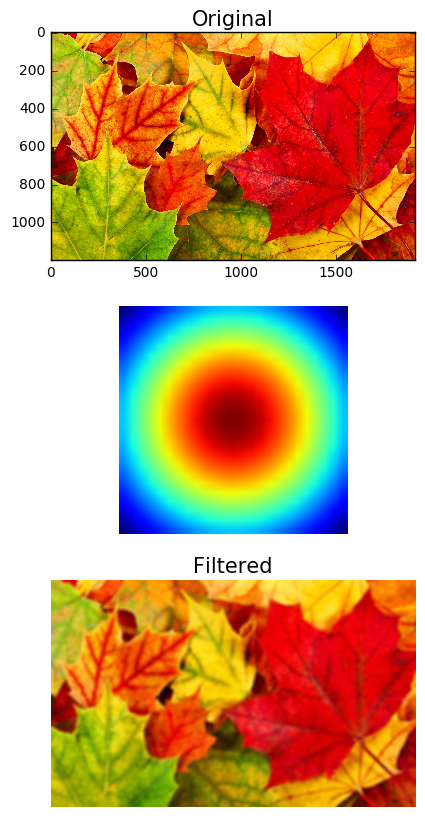

In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

fig, axis = plt.subplots(3, 1, figsize=(10, 10))
## load an image
img = cv2.cvtColor(cv2.imread('images/3/autumn-leaves.png', cv2.IMREAD_COLOR), cv2.COLOR_BGR2RGB)
[n, m, d] = np.shape(img)
print(n,m,d)

axis[0].imshow(img)
axis[0].set_title('Original', fontsize=15)
axis[0].tick_params(axis='x', labelsize=10)
axis[0].tick_params(axis='y', labelsize=10)


## Create some filters
filter_size = 25
filter_sigma = 10

uniform_filter = np.ones((filter_size, filter_size),np.float32)/filter_size**2

gaussian_filter = np.dot(cv2.getGaussianKernel(filter_size, filter_sigma, cv2.CV_64F),
                        (cv2.getGaussianKernel(filter_size, filter_sigma, cv2.CV_64F)).T)

sharpen = np.array((
    [0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0]), dtype="int")

laplacian_filter = np.array((
        [0, 1, 0],
        [1, -4, 1],
        [0, 1, 0]), dtype="int")

# construct the Sobel x-axis kernel
sobelX_filter = np.array((
        [-1, 0, 1],
        [-2, 0, 2],
        [-1, 0, 1]), dtype="int")

# construct the Sobel y-axis kernel
sobelY_filter = np.array((
        [-1, -2, -1],
        [0, 0, 0],
        [1, 2, 1]), dtype="int")

# axis[1].imshow(uniform_filter)
axis[1].imshow(gaussian_filter)
# axis[1].imshow(sharpen)
# axis[1].imshow(laplacian_filter)
# axis[1].imshow(sobelX_filter)
# axis[1].imshow(sobelY_filter)
axis[1].axis("off")

#print(gaussian_filter)

## Apply Gaussian filter, specifying an edge parameter
# img_filtered = cv2.filter2D(img, -1, uniform_filter, borderType=cv2.BORDER_CONSTANT) # seems to clip filter
# img_filtered = cv2.filter2D(img, -1, uniform_filter, borderType=cv2.BORDER_ISOLATED) # seems to clip filter
# img_filtered = cv2.filter2D(img, -1, uniform_filter, borderType=cv2.BORDER_WRAP) # wrap around filter
# img_filtered = cv2.filter2D(img, -1, uniform_filter, borderType=cv2.BORDER_REPLICATE) # copy edge filter
# img_filtered = cv2.filter2D(img, -1, uniform_filter, borderType=cv2.BORDER_REFLECT_101) # reflect across edge filter

## Apply Gaussian filter, specifying an edge parameter
# img_filtered = cv2.filter2D(img, -1, gaussian_filter, borderType=cv2.BORDER_CONSTANT) # seems to clip filter
# img_filtered = cv2.filter2D(img, -1, gaussian_filter, borderType=cv2.BORDER_ISOLATED) # seems to clip filter
# img_filtered = cv2.filter2D(img, -1, gaussian_filter, borderType=cv2.BORDER_WRAP) # wrap around filter
# img_filtered = cv2.filter2D(img, -1, gaussian_filter, borderType=cv2.BORDER_REPLICATE) # copy edge filter
img_filtered = cv2.filter2D(img, -1, gaussian_filter, borderType=cv2.BORDER_REFLECT_101) # reflect across edge filter

## Apply sharpen, specifying an edge parameter
# img_filtered = cv2.filter2D(img, -1, sharpen, borderType=cv2.BORDER_CONSTANT) # seem to clip filter
# img_filtered = cv2.filter2D(img, -1, sharpen, borderType=cv2.BORDER_ISOLATED) # seem to clip filter
# img_filtered = cv2.filter2D(img, -1, sharpen, borderType=cv2.BORDER_WRAP) # wrap around filter
# img_filtered = cv2.filter2D(img, -1, sharpen, borderType=cv2.BORDER_REPLICATE) # copy edge filter
# img_filtered = cv2.filter2D(img, -1, sharpen, borderType=cv2.BORDER_REFLECT_101) # reflect across edge filter

## Apply laplacian_filter, specifying an edge parameter
# img_filtered = cv2.filter2D(img, -1, laplacian_filter, borderType=cv2.BORDER_CONSTANT) # seem to clip filter
# img_filtered = cv2.filter2D(img, -1, laplacian_filter, borderType=cv2.BORDER_ISOLATED) # seem to clip filter
# img_filtered = cv2.filter2D(img, -1, laplacian_filter, borderType=cv2.BORDER_WRAP) # wrap around filter
# img_filtered = cv2.filter2D(img, -1, laplacian_filter, borderType=cv2.BORDER_REPLICATE) # copy edge filter
# img_filtered = cv2.filter2D(img, -1, laplacian_filter, borderType=cv2.BORDER_REFLECT_101) # reflect across edge filter

## Apply sobelX_filter, specifying an edge parameter
# img_filtered = cv2.filter2D(img, -1, sobelX_filter, borderType=cv2.BORDER_CONSTANT) # seem to clip filter
# img_filtered = cv2.filter2D(img, -1, sobelX_filter, borderType=cv2.BORDER_ISOLATED) # seem to clip filter
# img_filtered = cv2.filter2D(img, -1, sobelX_filter, borderType=cv2.BORDER_WRAP) # wrap around filter
# img_filtered = cv2.filter2D(img, -1, sobelX_filter, borderType=cv2.BORDER_REPLICATE) # copy edge filter
# img_filtered = cv2.filter2D(img, -1, sobelX_filter, borderType=cv2.BORDER_REFLECT_101) # reflect across edge filter

## Apply sobelY_filter, specifying an edge parameter
# img_filtered = cv2.filter2D(img, -1, sobelY_filter, borderType=cv2.BORDER_CONSTANT) # seem to clip filter
# img_filtered = cv2.filter2D(img, -1, sobelY_filter, borderType=cv2.BORDER_ISOLATED) # seem to clip filter
# img_filtered = cv2.filter2D(img, -1, sobelY_filter, borderType=cv2.BORDER_WRAP) # wrap around filter
# img_filtered = cv2.filter2D(img, -1, sobelY_filter, borderType=cv2.BORDER_REPLICATE) # copy edge filter
# img_filtered = cv2.filter2D(img, -1, sobelY_filter, borderType=cv2.BORDER_REFLECT_101) # reflect across edge filter

axis[2].imshow(img_filtered)
axis[2].axis("off")
#axis[2].tick_params(axis='x', labelsize=10)
#axis[2].tick_params(axis='y', labelsize=10)
axis[2].set_title('Filtered', fontsize=15)

# 3. Non-linear filters

Gaussian averaging is a reasonable thing if the noise is independent in each pixel and is centered about 0. So that is like, the noise is created by a Gaussian process.

Linear filters are essentially replacing the pixel values by the local average. And that was fine when the noise was not a huge amount of noise and __it tended to go to 0.__ 
So by averaging, the noise is tended to be averaged away and the right value of pixel is returned.

However, there are other kinds of noise as well. It may not be linear, such as 
<img src="images/3/diff_noise.png" width="500px">

In this case, there are some sort of arbitrary value that is put in some location. A few sort of totally random values are being injected into the image. 

__So, to deal with, some sort of middle value are introduced.__

## 1) Median filter
<img src="images/3/median_filter.png" width="400px">

Value 90 on top box is not probably right pixel. So, replacing it median value 27 rather than averaging.

This is a good way when there are some weird spike, and median is not a linear filter.

#### Median filter:
- No new pixel values introduced.
- Removes spikes (impluse, salt and pepper noise)
- Non linear
- Preserve edges
<img src="images/3/median_edge.png" width="250px">

### Code

```Python
Python: cv2.medianBlur(src, ksize[, dst]) → dst
```

Parameters:	
- __src:__ input 1-, 3-, or 4-channel image; when ksize is 3 or 5, the image depth should be CV_8U, CV_16U, or CV_32F, for larger aperture sizes, it can only be CV_8U.
- __dst:__ destination array of the same size and type as src.
- __ksize:__ aperture linear size; it must be odd and greater than 1, for example: 3, 5, 7 ...

635 960


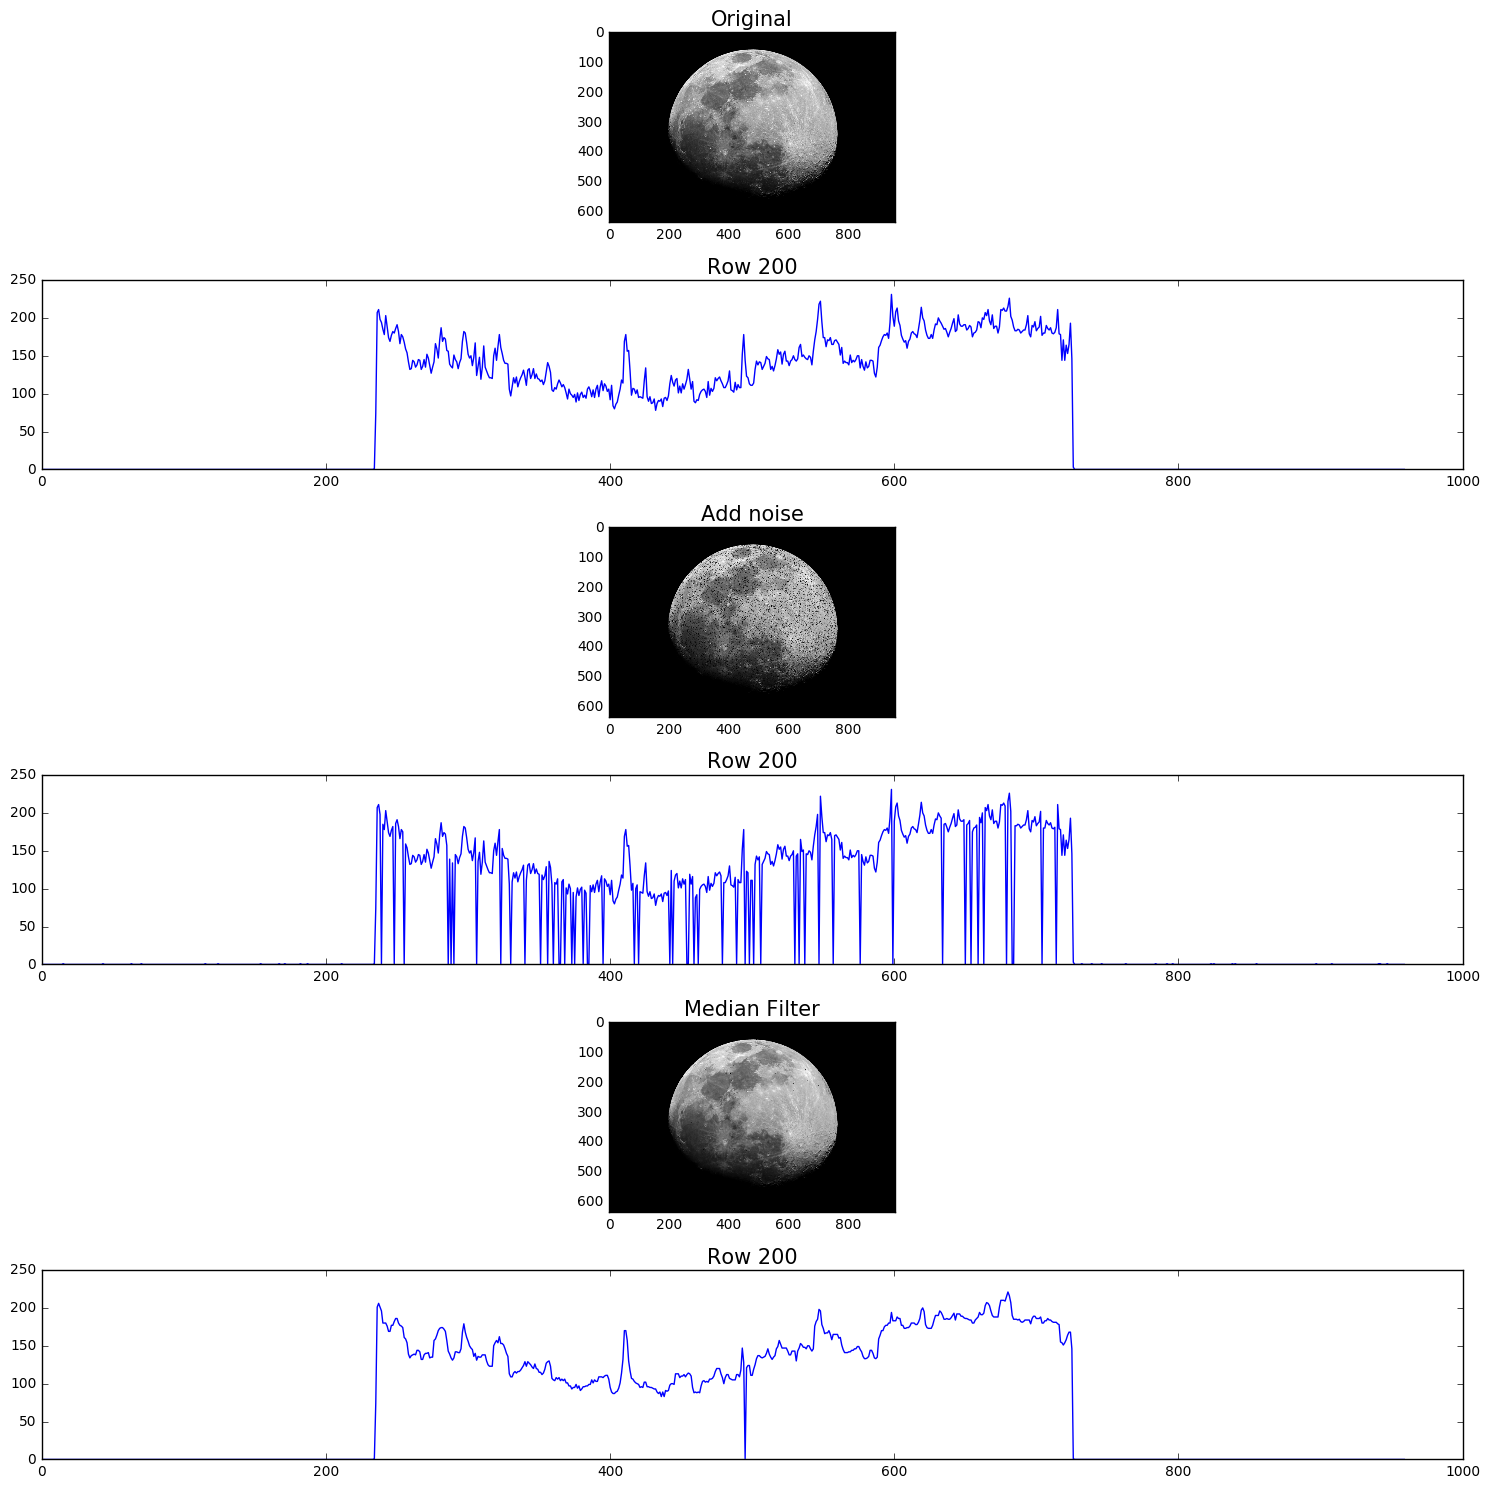

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

fig, axis = plt.subplots(6, 1, figsize=(15,15))
## load an image
img = cv2.imread('images/4/moon.png', cv2.IMREAD_GRAYSCALE)

[n, m] = np.shape(img)
print(n,m)

axis[0].imshow(img, cmap = 'gray', interpolation=None)
axis[0].set_title('Original', fontsize=15)
axis[0].tick_params(axis='x', labelsize=10)
axis[0].tick_params(axis='y', labelsize=10)

axis[1].plot(img[200,:])
axis[1].set_title('Row 200', fontsize=15)
axis[1].tick_params(axis='x', labelsize=10)
axis[1].tick_params(axis='y', labelsize=10)

## Add salt and pepper noise
probability = 0.05
rnd = np.random.rand(n, m)
img[rnd<probability] = 0
img[rnd>1-probability] = 1

axis[2].imshow(img, cmap = 'gray', interpolation=None)
axis[2].set_title('Add noise', fontsize=15)
axis[2].tick_params(axis='x', labelsize=10)
axis[2].tick_params(axis='y', labelsize=10)

axis[3].plot(img[200,:])
axis[3].set_title('Row 200', fontsize=15)
axis[3].tick_params(axis='x', labelsize=10)
axis[3].tick_params(axis='y', labelsize=10)

## median filter
smoothed = cv2.medianBlur(img, 3)

axis[4].imshow(smoothed, cmap = 'gray', interpolation=None)
axis[4].set_title('Median Filter', fontsize=15)
axis[4].tick_params(axis='x', labelsize=10)
axis[4].tick_params(axis='y', labelsize=10)

axis[5].plot(smoothed[200,:])
axis[5].set_title('Row 200', fontsize=15)
axis[5].tick_params(axis='x', labelsize=10)
axis[5].tick_params(axis='y', labelsize=10)

plt.tight_layout()